In [ ]:
# Google Driveをマウント（接続）するためのコード
from google.colab import drive
drive.mount('/content/drive')

# これを実行すると、URLと認証コード入力欄が表示されます。
# URLをクリックしてGoogleアカウントでログインし、表示された認証コードをコピーして入力欄に貼り付け、Enterキーを押してください。

Mounted at /content/drive


In [ ]:
import os

# Google Drive内の研究フォルダに移動
# 注意: 'MyDrive' はお使いの言語設定によって 'マイドライブ' などになる場合があります。
# もしエラーが出る場合は、左のファイルブラウザでパスを確認してください。
project_path = '/content/drive/MyDrive/master_research'
os.chdir(project_path)

# 現在の場所を確認
print(f"現在の作業ディレクトリ: {os.getcwd()}")

現在の作業ディレクトリ: /content/drive/MyDrive/master_research


In [ ]:
import pandas as pd
import numpy as np
import os

def calculate_features(df):
    """
    関節座標のデータフレームを受け取り、特徴量を追加して返す関数。
    (この関数の中身に変更はありません)
    """
    print("特徴量の計算を開始...")

    # 特徴量1: 胴体の向き（ヨー角）
    delta_x_shoulder = df['LEFT_SHOULDER_x'] - df['RIGHT_SHOULDER_x']
    delta_y_shoulder = df['LEFT_SHOULDER_y'] - df['RIGHT_SHOULDER_y']
    df['torso_angle_deg'] = np.degrees(np.arctan2(delta_y_shoulder, delta_x_shoulder))

    # 中間処理：骨盤のフレーム間移動量
    hip_delta_x = df['hip_x'].diff()
    hip_delta_y = df['hip_y'].diff()

    # 特徴量2: 進行方向の変化
    df['travel_angle_deg'] = np.degrees(np.arctan2(hip_delta_y, hip_delta_x))
    df['travel_angle_smooth'] = df['travel_angle_deg'].rolling(window=5, center=True, min_periods=1).mean()

    # 特徴量3: 歩行速度
    df['speed_px_per_frame'] = np.sqrt(hip_delta_x**2 + hip_delta_y**2)
    df['speed_smooth'] = df['speed_px_per_frame'].rolling(window=5, center=True, min_periods=1).mean()

    print("特徴量の計算が完了。")
    return df



# --- ここからメイン処理 ---

# 入力と出力のフォルダ名を定義
input_directory = 'labeled_landmarks'
output_directory = 'features_landmarks'

if not os.path.exists(output_directory):
    os.makedirs(output_directory)
    print(f"フォルダ '{output_directory}' を作成しました。")

# --- 【変更点】ファイル名を一つ一つ、すべて手で書き出します ---
filenames = [
    'landmarks_00001.mp4.csv',
    'landmarks_00002.mp4.csv',
    'landmarks_00003.mp4.csv',
    'landmarks_00004.mp4.csv',
    'landmarks_00005.mp4.csv',
    'landmarks_00006.mp4.csv',
    'landmarks_00007.mp4.csv',
    'landmarks_00008.mp4.csv',
    'landmarks_00009.mp4.csv',
    'landmarks_00010.mp4.csv',
    'landmarks_00011.mp4.csv',
    'landmarks_00012.mp4.csv',
    'landmarks_00013.mp4.csv',
    'landmarks_00014.mp4.csv',
    'landmarks_00015.mp4.csv',
]

# フォルダパスとファイル名を結合して、完全なファイルパスのリストを作成
file_paths = [os.path.join(input_directory, fname) for fname in filenames]

print(f"{len(file_paths)}個のファイルを処理します。")

# ループ処理
for path in file_paths:
    if not os.path.exists(path):
        print(f"エラー: ファイルが見つかりません -> {path}")
        continue

    print("-" * 30)
    print(f"処理中のファイル: {path}")

    data_df = pd.read_csv(path)
    features_df = calculate_features(data_df)

    base_filename = os.path.basename(path).replace('.mp4.csv', '_features.csv')
    output_path = os.path.join(output_directory, base_filename)

    features_df.to_csv(output_path, index=False)

    print(f"結果を保存しました: {output_path}")

print("-" * 30)
print("\n全てのファイルの処理が完了しました。")

15個のファイルを処理します。
------------------------------
処理中のファイル: labeled_landmarks/landmarks_00001.mp4.csv
特徴量の計算を開始...
特徴量の計算が完了。
結果を保存しました: features_landmarks/landmarks_00001_features.csv
------------------------------
処理中のファイル: labeled_landmarks/landmarks_00002.mp4.csv
特徴量の計算を開始...
特徴量の計算が完了。
結果を保存しました: features_landmarks/landmarks_00002_features.csv
------------------------------
処理中のファイル: labeled_landmarks/landmarks_00003.mp4.csv
特徴量の計算を開始...
特徴量の計算が完了。
結果を保存しました: features_landmarks/landmarks_00003_features.csv
------------------------------
処理中のファイル: labeled_landmarks/landmarks_00004.mp4.csv
特徴量の計算を開始...
特徴量の計算が完了。
結果を保存しました: features_landmarks/landmarks_00004_features.csv
------------------------------
処理中のファイル: labeled_landmarks/landmarks_00005.mp4.csv
特徴量の計算を開始...
特徴量の計算が完了。
結果を保存しました: features_landmarks/landmarks_00005_features.csv
------------------------------
処理中のファイル: labeled_landmarks/landmarks_00006.mp4.csv
特徴量の計算を開始...
特徴量の計算が完了。
結果を保存しました: features_landmarks/landmarks_00006_f

In [ ]:
import pandas as pd
import numpy as np
import glob
import os

def calculate_advanced_features(df):
    """
    特徴量を追加する関数（新特徴量追加版）
    """
    print("特徴量の計算を開始...")

    # --- 既存の特徴量 ---
    delta_x_shoulder = df['left_shoulder_x'] - df['right_shoulder_x']
    delta_y_shoulder = df['left_shoulder_y'] - df['right_shoulder_y']
    df['torso_angle_deg'] = np.degrees(np.arctan2(delta_y_shoulder, delta_x_shoulder))

    hip_x = (df['left_hip_x'] + df['right_hip_x']) / 2
    hip_y = (df['left_hip_y'] + df['right_hip_y']) / 2
    hip_delta_x = hip_x.diff()
    hip_delta_y = hip_y.diff()

    df['travel_angle_deg'] = np.degrees(np.arctan2(hip_delta_y, hip_delta_x))
    df['travel_angle_smooth'] = df['travel_angle_deg'].rolling(window=5, center=True, min_periods=1).mean()

    df['speed_px_per_frame'] = np.sqrt(hip_delta_x**2 + hip_delta_y**2)
    df['speed_smooth'] = df['speed_px_per_frame'].rolling(window=5, center=True, min_periods=1).mean()

# --- メイン処理 (変更なし) ---
input_directory = 'labeled_landmarks'
output_directory = 'features_landmarks'
# ... (以下、ファイル読み込みと保存のループ部分は前回と同じです)
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
file_paths = glob.glob(os.path.join(input_directory, 'landmarks_*.mp4.csv'))
if not file_paths:
    print(f"エラー: '{input_directory}' フォルダ内にCSVファイルが見つかりません。")
else:
    joints = ['nose', 'left_eye_inner', 'left_eye', 'left_eye_outer', 'right_eye_inner', 'right_eye', 'right_eye_outer', 'left_ear', 'right_ear', 'mouth_left', 'mouth_right', 'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist', 'right_wrist', 'left_pinky', 'right_pinky', 'left_index', 'right_index', 'left_thumb', 'right_thumb', 'left_hip', 'right_hip', 'left_knee', 'right_knee', 'left_ankle', 'right_ankle', 'left_heel', 'right_heel', 'left_foot_index', 'right_foot_index']
    cols = []
    for j in joints:
        cols.extend([f'{j}_x', f'{j}_y', f'{j}_z', f'{j}_visibility'])
    print(f"{len(file_paths)}個のファイルを処理します。")
    for path in file_paths:
        print("-" * 30); print(f"処理中のファイル: {path}")
        data_df = pd.read_csv(path, header=None)
        if len(data_df.columns) == len(cols):
            data_df.columns = cols
            print(f"{len(cols)}個の列名を正しく設定しました。")
        else:
            print(f"エラー: 列数が{len(cols)}ではありません (実際の列数: {len(data_df.columns)})。スキップします。"); continue
        features_df = calculate_advanced_features(data_df) # 関数名を変更
        base_filename = os.path.basename(path).replace('.mp4.csv', '_features.csv')
        output_path = os.path.join(output_directory, base_filename)
        features_df.to_csv(output_path, index=False)
        print(f"結果を保存しました: {output_path}")
    print("-" * 30); print("\n全てのファイルの処理が完了しました。")

15個のファイルを処理します。
------------------------------
処理中のファイル: labeled_landmarks/landmarks_00001.mp4.csv
エラー: 列数が132ではありません (実際の列数: 32)。スキップします。
------------------------------
処理中のファイル: labeled_landmarks/landmarks_00002.mp4.csv
エラー: 列数が132ではありません (実際の列数: 32)。スキップします。
------------------------------
処理中のファイル: labeled_landmarks/landmarks_00003.mp4.csv
エラー: 列数が132ではありません (実際の列数: 32)。スキップします。
------------------------------
処理中のファイル: labeled_landmarks/landmarks_00004.mp4.csv
エラー: 列数が132ではありません (実際の列数: 32)。スキップします。
------------------------------
処理中のファイル: labeled_landmarks/landmarks_00005.mp4.csv
エラー: 列数が132ではありません (実際の列数: 32)。スキップします。
------------------------------
処理中のファイル: labeled_landmarks/landmarks_00006.mp4.csv
エラー: 列数が132ではありません (実際の列数: 32)。スキップします。
------------------------------
処理中のファイル: labeled_landmarks/landmarks_00007.mp4.csv
エラー: 列数が132ではありません (実際の列数: 32)。スキップします。
------------------------------
処理中のファイル: labeled_landmarks/landmarks_00008.mp4.csv
エラー: 列数が132ではありません (実際の列数: 32)。スキップします。


In [ ]:
!pip install japanize-matplotlib
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=a2fb8a2c5ffbc6f0d6f37d3d3dc7fae6fca5ce3b4c6a885cbfe0effd47040a59
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize-matplotlib


--- データの読み込み完了 ---
元の総訓練フレーム数: 4092
元の総テストフレーム数: 1501
------------------------------
--- 訓練データのNaN（欠損値）チェック ---
frame                   0
RIGHT_EYE_x             0
RIGHT_EYE_y             0
LEFT_EYE_x              0
LEFT_EYE_y              0
RIGHT_SHOULDER_x        0
RIGHT_SHOULDER_y        0
LEFT_SHOULDER_x         0
LEFT_SHOULDER_y         0
RIGHT_ELBOW_x           0
RIGHT_ELBOW_y           0
LEFT_ELBOW_x            0
LEFT_ELBOW_y            0
hip_x                   0
hip_y                   0
RIGHT_WRIST_x           0
RIGHT_WRIST_y           0
LEFT_WRIST_x            0
LEFT_WRIST_y            0
RIGHT_KNEE_x            0
RIGHT_KNEE_y            0
LEFT_KNEE_x             0
LEFT_KNEE_y             0
RIGHT_ANKLE_x           0
RIGHT_ANKLE_y           0
LEFT_ANKLE_x            0
LEFT_ANKLE_y            0
RIGHT_FOOT_INDEX_x      0
RIGHT_FOOT_INDEX_y      0
LEFT_FOOT_INDEX_x       0
LEFT_FOOT_INDEX_y       0
phase_label             0
torso_angle_deg         0
travel_angle_deg       12
trav

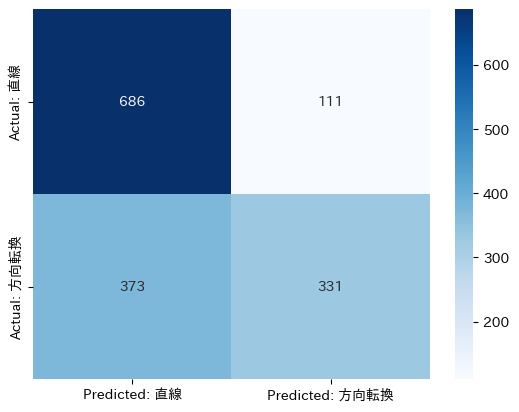

In [ ]:
import pandas as pd
import numpy as np
import glob
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. データの準備 ---
features_directory = 'features_landmarks'
all_files = sorted(glob.glob(os.path.join(features_directory, '*.csv')))
train_files = all_files[:12]
test_files = all_files[12:]

train_df = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)
test_df = pd.concat([pd.read_csv(f) for f in test_files], ignore_index=True)

print("--- データの読み込み完了 ---")
print(f"元の総訓練フレーム数: {len(train_df)}")
print(f"元の総テストフレーム数: {len(test_df)}")
print("-" * 30)


# --- 2. データの前処理と「健康診断」 ---

# 【診断コード】NaN（欠損値）がどの列にどれだけあるかを確認します
print("--- 訓練データのNaN（欠損値）チェック ---")
print(train_df.isnull().sum())
print("-" * 30)

# 【修正点】dropna()をより安全な方法に変更します
# 特徴量として使う列に絞って、その列にNaNがある行だけを削除します
feature_columns = [
    'torso_angle_deg',
    'travel_angle_smooth',
    'speed_smooth'
]
train_df.dropna(subset=feature_columns, inplace=True)
test_df.dropna(subset=feature_columns, inplace=True)

print(f"NaN削除後の総訓練フレーム数: {len(train_df)}")
print(f"NaN削除後の総テストフレーム数: {len(test_df)}")
print("-" * 30)

# もしNaN削除後にフレーム数が0になる場合は、特徴量計算に問題がある可能性があります。
if len(train_df) == 0:
    print("エラー: NaNを削除した結果、訓練データが0件になりました。")
    print("特徴量計算の過程で、全ての行にNaNが生成されている可能性があります。")
else:
    # 入力データ(X)と正解ラベル(y)に分割
    X_train = train_df[feature_columns]
    y_train = train_df['phase_label']

    X_test = test_df[feature_columns]
    y_test = test_df['phase_label']

    # --- 3. モデルの訓練 ---
    print("\nランダムフォレストモデルの訓練を開始...")
    model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    print("モデルの訓練が完了。")

    # --- 4. モデルの性能評価 ---
    print("\nテストデータで性能を評価...")
    y_pred = model.predict(X_test)

    print(f"\n正解率 (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['1: 直線歩行', '2: 方向転換']))
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted: 直線', 'Predicted: 方向転換'],
                yticklabels=['Actual: 直線', 'Actual: 方向転換'])
    plt.show()

##特徴量追加：骨盤の加速度

In [ ]:
import pandas as pd
import numpy as np
import glob
import os

def calculate_features(df):
    """
    特徴量を追加する関数（NumPy/Pandasの型問題を修正）
    """
    print("特徴量の計算を開始...")

    # --- 既存の特徴量 ---
    delta_x_shoulder = df['left_shoulder_x'] - df['right_shoulder_x']
    delta_y_shoulder = df['left_shoulder_y'] - df['right_shoulder_y']
    df['torso_angle_deg'] = np.degrees(np.arctan2(delta_y_shoulder, delta_x_shoulder))

    hip_x = (df['hip_x']) / 2
    hip_y = (df['hip_y']) / 2
    hip_delta_x = hip_x.diff()
    hip_delta_y = hip_y.diff()

    df['travel_angle_deg'] = np.degrees(np.arctan2(hip_delta_y, hip_delta_x))
    df['travel_angle_smooth'] = df['travel_angle_deg'].rolling(window=5, center=True, min_periods=1).mean()

    df['speed_px_per_frame'] = np.sqrt(hip_delta_x**2 + hip_delta_y**2)
    df['speed_smooth'] = df['speed_px_per_frame'].rolling(window=5, center=True, min_periods=1).mean()

    # --- 【ここからが修正点】 ---

    # 4. 胴体の角速度
    torso_diff = df['torso_angle_deg'].diff()
    torso_diff_corrected = np.where(torso_diff > 180, torso_diff - 360, torso_diff)
    torso_diff_corrected = np.where(torso_diff_corrected < -180, torso_diff_corrected + 360, torso_diff_corrected)
    # 一度PandasのSeriesに戻してから、rollingを適用する
    df['torso_angular_velocity_smooth'] = pd.Series(torso_diff_corrected).rolling(window=5, center=True, min_periods=1).mean()

    # 5. 進行方向の角速度
    travel_diff = df['travel_angle_smooth'].diff()
    travel_diff_corrected = np.where(travel_diff > 180, travel_diff - 360, travel_diff)
    travel_diff_corrected = np.where(travel_diff_corrected < -180, travel_diff_corrected + 360, travel_diff_corrected)
    # 同様に、一度PandasのSeriesに戻す
    df['travel_angular_velocity_smooth'] = pd.Series(travel_diff_corrected).rolling(window=5, center=True, min_periods=1).mean()

    # 6. 加速度
    acceleration_series = df['speed_smooth'].diff()
    # 同様に、一度PandasのSeriesに戻す (この場合は元々Seriesだが、統一性のため)
    df['speed_acceleration_smooth'] = pd.Series(acceleration_series).rolling(window=5, center=True, min_periods=1).mean()

    print("特徴量の計算が完了。")
    return df

# --- メイン処理 (変更なし) ---
input_directory = 'labeled_landmarks'
output_directory = 'features_landmarks'

if not os.path.exists(output_directory):
    os.makedirs(output_directory)

file_paths = glob.glob(os.path.join(input_directory, 'landmarks_*.mp4.csv'))

if not file_paths:
    print(f"エラー: '{input_directory}' フォルダ内にCSVファイルが見つかりません。")
else:
    # (列名設定部分は前回から変更なし)
    joints = ['nose', 'left_eye_inner', 'left_eye', 'left_eye_outer', 'right_eye_inner', 'right_eye', 'right_eye_outer', 'left_ear', 'right_ear', 'mouth_left', 'mouth_right', 'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist', 'right_wrist', 'left_pinky', 'right_pinky', 'left_index', 'right_index', 'left_thumb', 'right_thumb', 'left_hip', 'right_hip', 'left_knee', 'right_knee', 'left_ankle', 'right_ankle', 'left_heel', 'right_heel', 'left_foot_index', 'right_foot_index']
    cols = []
    for j in joints:
        cols.extend([f'{j}_x', f'{j}_y', f'{j}_z', f'{j}_visibility'])
    print(f"{len(file_paths)}個のファイルを処理します。")
    for path in file_paths:
        print("-" * 30); print(f"処理中のファイル: {path}")
        data_df = pd.read_csv(path)
        data_df.columns = data_df.columns.str.lower() #列名を小文字に統一
        if 'phase_label' not in data_df.columns:
            print(f"エラー: '{path}'に'phase_label'列が見つかりません。スキップします。"); continue
        features_df = calculate_features(data_df)
        base_filename = os.path.basename(path).replace('.mp4.csv', '_features.csv')
        output_path = os.path.join(output_directory, base_filename)
        features_df.to_csv(output_path, index=False)
        print(f"結果を保存しました: {output_path}")
    print("-" * 30); print("\n全てのファイルの処理が完了しました。")

15個のファイルを処理します。
------------------------------
処理中のファイル: labeled_landmarks/landmarks_00001.mp4.csv
特徴量の計算を開始...
特徴量の計算が完了。
結果を保存しました: features_landmarks/landmarks_00001_features.csv
------------------------------
処理中のファイル: labeled_landmarks/landmarks_00002.mp4.csv
特徴量の計算を開始...
特徴量の計算が完了。
結果を保存しました: features_landmarks/landmarks_00002_features.csv
------------------------------
処理中のファイル: labeled_landmarks/landmarks_00003.mp4.csv
特徴量の計算を開始...
特徴量の計算が完了。
結果を保存しました: features_landmarks/landmarks_00003_features.csv
------------------------------
処理中のファイル: labeled_landmarks/landmarks_00004.mp4.csv
特徴量の計算を開始...
特徴量の計算が完了。
結果を保存しました: features_landmarks/landmarks_00004_features.csv
------------------------------
処理中のファイル: labeled_landmarks/landmarks_00005.mp4.csv
特徴量の計算を開始...
特徴量の計算が完了。
結果を保存しました: features_landmarks/landmarks_00005_features.csv
------------------------------
処理中のファイル: labeled_landmarks/landmarks_00006.mp4.csv
特徴量の計算を開始...
特徴量の計算が完了。
結果を保存しました: features_landmarks/landmarks_00006_f

訓練データ数: 12 ファイル
テストデータ数: 3 ファイル
総訓練フレーム数: 4092
総テストフレーム数: 1501
NaN削除後の総訓練フレーム数: 4092
NaN削除後の総テストフレーム数: 1501

ランダムフォレストモデルの訓練を開始...
モデルの訓練が完了。

テストデータで性能を評価...

正解率 (Accuracy): 0.6862

Classification Report:
              precision    recall  f1-score   support

     1: 直線歩行       0.65      0.87      0.75       797
     2: 方向転換       0.76      0.48      0.59       704

    accuracy                           0.69      1501
   macro avg       0.71      0.67      0.67      1501
weighted avg       0.70      0.69      0.67      1501


Confusion Matrix:


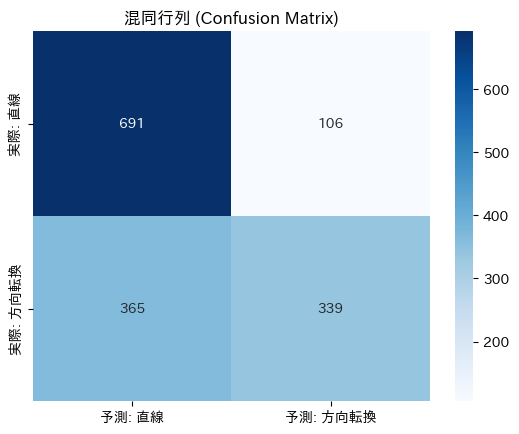

In [ ]:
import pandas as pd
import numpy as np
import glob
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 日本語表示のためのライブラリをインストールしてインポート
!pip install -q japanize-matplotlib
import japanize_matplotlib

# --- 1. データの準備 ---

# 特徴量データが保存されているフォルダ
features_directory = 'features_landmarks'

# 15人分のファイルパスを全て取得
all_files = sorted(glob.glob(os.path.join(features_directory, '*.csv')))

# 訓練用(12人分)とテスト用(3人分)にファイルパスを分割
train_files = all_files[:12] # 最初の12人分
test_files = all_files[12:]  # 残りの3人分

print(f"訓練データ数: {len(train_files)} ファイル")
print(f"テストデータ数: {len(test_files)} ファイル")

# 訓練データを一つの大きなデータフレームに結合
train_df = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)

# テストデータを同様に結合
test_df = pd.concat([pd.read_csv(f) for f in test_files], ignore_index=True)

print(f"総訓練フレーム数: {len(train_df)}")
print(f"総テストフレーム数: {len(test_df)}")

# --- 2. データの前処理 ---

# 今回追加した特徴量も含めたリスト
feature_columns = [
    'torso_angle_deg',
    'travel_angle_smooth',
    'speed_smooth',
    'torso_angular_velocity_smooth',
    'travel_angular_velocity_smooth',
    'speed_acceleration_smooth'
]

# 正解ラベル列
label_column = 'phase_label'

# NaN（欠損値）が含まれる行を削除
# これで、diff()やrolling()で発生したNaNが除去されます
columns_to_check_for_nan = feature_columns + [label_column]
train_df.dropna(subset=columns_to_check_for_nan, inplace=True)
test_df.dropna(subset=columns_to_check_for_nan, inplace=True)

print(f"NaN削除後の総訓練フレーム数: {len(train_df)}")
print(f"NaN削除後の総テストフレーム数: {len(test_df)}")

# 入力データ(X)と正解ラベル(y)に分割
X_train = train_df[feature_columns]
y_train = train_df[label_column]

X_test = test_df[feature_columns]
y_test = test_df[label_column]

# --- 3. モデルの訓練 ---
print("\nランダムフォレストモデルの訓練を開始...")
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
print("モデルの訓練が完了。")

# --- 4. モデルの性能評価 ---
print("\nテストデータで性能を評価...")
y_pred = model.predict(X_test)

print(f"\n正解率 (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['1: 直線歩行', '2: 方向転換']))
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['予測: 直線', '予測: 方向転換'],
            yticklabels=['実際: 直線', '実際: 方向転換'])
plt.title('混同行列 (Confusion Matrix)')
plt.show()

##LSTM


In [ ]:
import pandas as pd
import numpy as np
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# TensorFlowとKerasライブラリをインポート
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# --- 1. データの準備 ---

features_directory = 'features_landmarks'
all_files = sorted(glob.glob(os.path.join(features_directory, '*.csv')))

# 訓練用(10人), 検証用(2人), テスト用(3人)にファイルを分割
train_files = all_files[:10]
val_files = all_files[10:12]
test_files = all_files[12:]

print(f"訓練データ: {len(train_files)} ファイル")
print(f"検証データ: {len(val_files)} ファイル")
print(f"テストデータ: {len(test_files)} ファイル")

# データ読み込み用の関数
def load_data(files):
    df_list = [pd.read_csv(f) for f in files]
    return pd.concat(df_list, ignore_index=True)

train_df = load_data(train_files)
val_df = load_data(val_files)
test_df = load_data(test_files)

# 特徴量とラベルの列を定義
feature_columns = ['torso_angle_deg', 'travel_angle_smooth', 'speed_smooth', 'torso_angular_velocity_smooth', 'travel_angular_velocity_smooth', 'speed_acceleration_smooth']
label_column = 'phase_label'

# NaNを含む行を削除
columns_to_check_for_nan = feature_columns + [label_column]
train_df.dropna(subset=columns_to_check_for_nan, inplace=True)
val_df.dropna(subset=columns_to_check_for_nan, inplace=True)
test_df.dropna(subset=columns_to_check_for_nan, inplace=True)

# --- 2. データのスケーリング ---
# Neural Networkでは、入力データのスケールを揃えることが非常に重要
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_df[feature_columns])
X_val_scaled = scaler.transform(val_df[feature_columns])
X_test_scaled = scaler.transform(test_df[feature_columns])

y_train = train_df[label_column]
y_val = val_df[label_column]
y_test = test_df[label_column]

# ラベルを 1, 2 から 0, 1 に変換 (Neural Networkが扱いやすいため)
y_train_mapped = y_train - 1
y_val_mapped = y_val - 1
y_test_mapped = y_test - 1

# --- 3. シーケンスデータの作成 ---
# LSTMは「過去Nフレームのデータを見て、現在のフレームを予測する」モデル
# そのため、データを(Nフレーム x 特徴量数)の形に変形する必要がある

def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 20 # 過去20フレームの文脈を読む設定

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_mapped, TIME_STEPS)
X_val_seq, y_val_seq = create_sequences(X_val_scaled, y_val_mapped, TIME_STEPS)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_mapped, TIME_STEPS)

print(f"\nシーケンス変換後の訓練データの形状: {X_train_seq.shape}")

# --- 4. LSTMモデルの構築 ---
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model.add(Dropout(0.2)) # 過学習を防ぐための層
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid')) # 2クラス分類なので出力は1つ、活性化関数はsigmoid

# モデルのコンパイル
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# --- 5. モデルの訓練 ---
print("\nLSTMモデルの訓練を開始...")
history = model.fit(
    X_train_seq, y_train_seq,
    epochs=20, # 訓練データを20周学習させる
    batch_size=32,
    validation_data=(X_val_seq, y_val_seq),
    shuffle=False
)
print("モデルの訓練が完了。")

# --- 6. モデルの性能評価 ---
print("\nテストデータで性能を評価...")
# 予測結果は確率(0~1)で出力される
y_pred_proba = model.predict(X_test_seq)
# 確率が0.5以上ならクラス1(方向転換)、未満ならクラス0(直線歩行)と判断
y_pred = (y_pred_proba > 0.5).astype(int)

print(f"\n正解率 (Accuracy): {accuracy_score(y_test_seq, y_pred):.4f}")
print("\nClassification Report:")
# ラベルを 0, 1 から 1, 2 に戻して表示
print(classification_report(y_test_seq + 1, y_pred + 1, target_names=['1: 直線歩行', '2: 方向転換']))

訓練データ: 10 ファイル
検証データ: 2 ファイル
テストデータ: 3 ファイル

シーケンス変換後の訓練データの形状: (3489, 20, 6)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,289 (79.25 KB)

 Trainable params: 20,289 (79.25 KB)

 Non-trainable params: 0 (0.00 B)


LSTMモデルの訓練を開始...
Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6657 - loss: 0.6353 - val_accuracy: 0.7584 - val_loss: 0.5708
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8256 - loss: 0.4451 - val_accuracy: 0.7833 - val_loss: 0.5418
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8348 - loss: 0.3768 - val_accuracy: 0.7815 - val_loss: 0.5500
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8466 - loss: 0.3722 - val_accuracy: 0.7833 - val_loss: 0.5691
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8595 - loss: 0.3536 - val_accuracy: 0.7869 - val_loss: 0.5803
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8669 - loss: 0.3361 - val_accuracy: 0.7851 - val_loss: 0.5866
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8672 - loss: 0.3241 - val_accuracy: 0.7869 - val_loss: 0.6038
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8697 - loss:

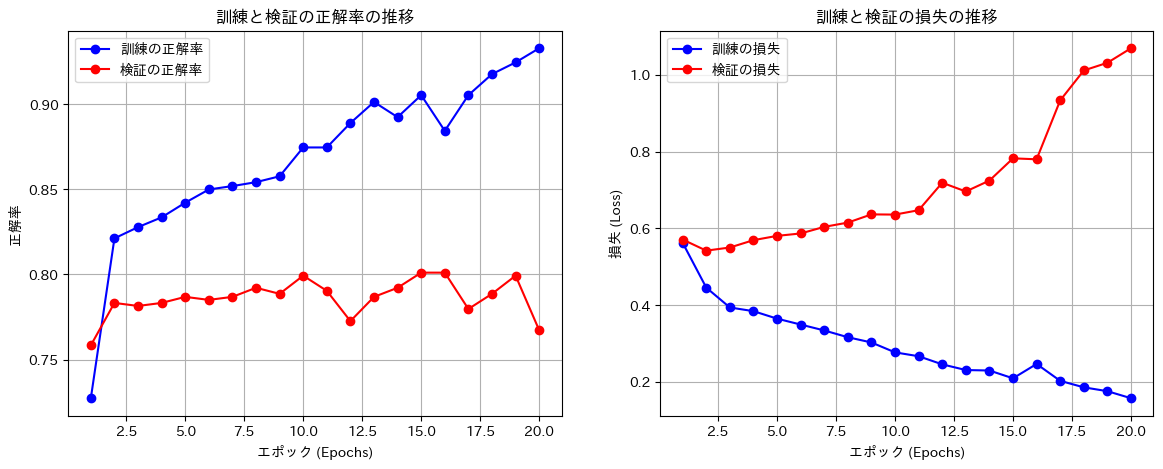

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib # 日本語表示のため

# --- 訓練過程のデータを取得 ---
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# --- 2つのグラフを描画 ---
plt.figure(figsize=(14, 5))

# 左側のグラフ：正解率(Accuracy)の推移
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='訓練の正解率')
plt.plot(epochs, val_acc, 'ro-', label='検証の正解率')
plt.title('訓練と検証の正解率の推移')
plt.xlabel('エポック (Epochs)')
plt.ylabel('正解率')
plt.legend()
plt.grid(True)

# 右側のグラフ：損失(Loss)の推移
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='訓練の損失')
plt.plot(epochs, val_loss, 'ro-', label='検証の損失')
plt.title('訓練と検証の損失の推移')
plt.xlabel('エポック (Epochs)')
plt.ylabel('損失 (Loss)')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# (セル1の準備と、セル2のデータ準備〜シーケンス作成までは全く同じです)
# ...

# --- 4. LSTMモデルの構築 (変更なし) ---
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


# --- 【ここからが修正・追加点】 ---

# 5. EarlyStoppingの設定
# 検証データの損失(val_loss)を監視し、5エポック連続で改善が見られなかったら学習を停止する
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True # 最も性能が良かった時点のモデル重みを復元する
)

# 6. モデルの訓練 (callbacksを追加)
print("\nLSTMモデルの訓練を開始 (EarlyStoppingあり)...")
history = model.fit(
    X_train_seq, y_train_seq,
    epochs=50, # epochsは多めに設定しても、EarlyStoppingが最適なタイミングで止めてくれる
    batch_size=32,
    validation_data=(X_val_seq, y_val_seq),
    shuffle=False,
    callbacks=[early_stopping] # ここに設定を追加
)
print("モデルの訓練が完了。")

# --- 7. モデルの性能評価 (変更なし) ---
# ... (評価コードは前回と全く同じ)
print("\nテストデータで性能を評価...")
y_pred_proba = model.predict(X_test_seq)
y_pred = (y_pred_proba > 0.5).astype(int)
print(f"\n正解率 (Accuracy): {accuracy_score(y_test_seq, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_seq + 1, y_pred + 1, target_names=['1: 直線歩行', '2: 方向転換']))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,289 (79.25 KB)

 Trainable params: 20,289 (79.25 KB)

 Non-trainable params: 0 (0.00 B)


LSTMモデルの訓練を開始 (EarlyStoppingあり)...
Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.6898 - loss: 0.6268 - val_accuracy: 0.7584 - val_loss: 0.5861
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8338 - loss: 0.4173 - val_accuracy: 0.7851 - val_loss: 0.5534
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8452 - loss: 0.3749 - val_accuracy: 0.7922 - val_loss: 0.5626
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8483 - loss: 0.3724 - val_accuracy: 0.7886 - val_loss: 0.5982
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8590 - loss: 0.3514 - val_accuracy: 0.7869 - val_loss: 0.6029
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8650 - loss: 0.3334 - val_accuracy: 0.7886 - val_loss: 0.6376
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8655 - loss: 0.3167 - val_accuracy: 0.7762 - val_loss: 0.6832
モデルの訓練が完了。

テストデータで性能を評価...
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms

EarlyStoppingにより、訓練は 7 エポックで停止しました。


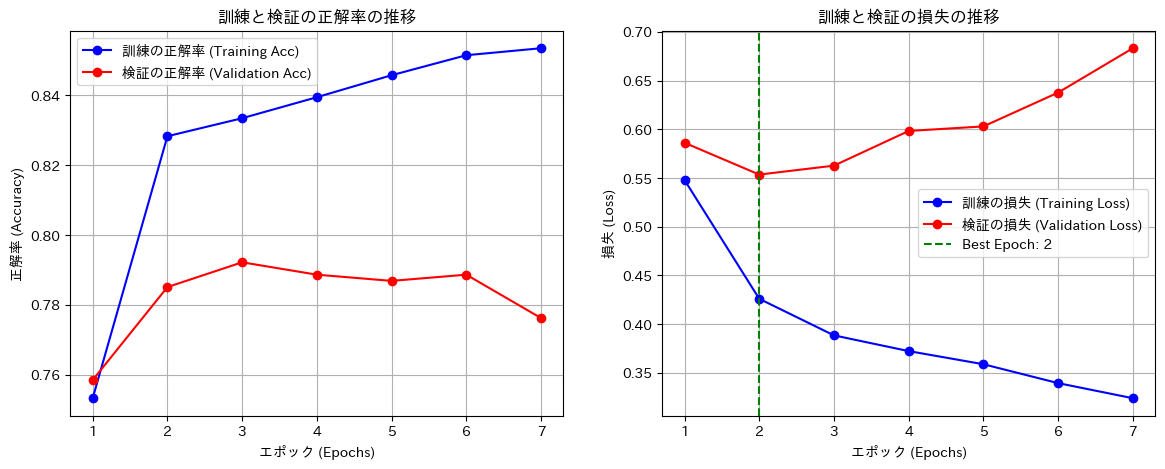

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib # 日本語表示のため

# --- 訓練過程のデータを取得 ---
# historyオブジェクトは前回のセルで作成されている前提
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# 実際に学習したエポック数を取得
epochs_ran = len(acc)
epochs = range(1, epochs_ran + 1)

print(f"EarlyStoppingにより、訓練は {epochs_ran} エポックで停止しました。")

# --- 2つのグラフを描画 ---
plt.figure(figsize=(14, 5))

# 左側のグラフ：正解率(Accuracy)の推移
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='訓練の正解率 (Training Acc)')
plt.plot(epochs, val_acc, 'ro-', label='検証の正解率 (Validation Acc)')
plt.title('訓練と検証の正解率の推移')
plt.xlabel('エポック (Epochs)')
plt.ylabel('正解率 (Accuracy)')
plt.legend()
plt.grid(True)

# 右側のグラフ：損失(Loss)の推移
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='訓練の損失 (Training Loss)')
plt.plot(epochs, val_loss, 'ro-', label='検証の損失 (Validation Loss)')
# 最も損失が小さかったエポックに印をつける
best_epoch = np.argmin(val_loss) + 1
plt.axvline(x=best_epoch, color='g', linestyle='--', label=f'Best Epoch: {best_epoch}')
plt.title('訓練と検証の損失の推移')
plt.xlabel('エポック (Epochs)')
plt.ylabel('損失 (Loss)')
plt.legend()
plt.grid(True)

plt.show()

##さらなる精度向上のために

In [ ]:
import pandas as pd
import numpy as np
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# TensorFlowとKerasライブラリをインポート
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# --- 1. データの準備 ---

features_directory = 'features_landmarks'
all_files = sorted(glob.glob(os.path.join(features_directory, '*.csv')))

# 訓練用(10人), 検証用(2人), テスト用(3人)にファイルを分割
train_files = all_files[:10]
val_files = all_files[10:12]
test_files = all_files[12:]

print(f"訓練データ: {len(train_files)} ファイル")
print(f"検証データ: {len(val_files)} ファイル")
print(f"テストデータ: {len(test_files)} ファイル")

# データ読み込み用の関数
def load_data(files):
    df_list = [pd.read_csv(f) for f in files]
    return pd.concat(df_list, ignore_index=True)

train_df = load_data(train_files)
val_df = load_data(val_files)
test_df = load_data(test_files)

# 特徴量とラベルの列を定義
feature_columns = ['torso_angle_deg', 'travel_angle_smooth', 'speed_smooth', 'torso_angular_velocity_smooth', 'travel_angular_velocity_smooth', 'speed_acceleration_smooth']
label_column = 'phase_label'

# NaNを含む行を削除
columns_to_check_for_nan = feature_columns + [label_column]
train_df.dropna(subset=columns_to_check_for_nan, inplace=True)
val_df.dropna(subset=columns_to_check_for_nan, inplace=True)
test_df.dropna(subset=columns_to_check_for_nan, inplace=True)

# --- 2. データのスケーリング ---
# Neural Networkでは、入力データのスケールを揃えることが非常に重要
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_df[feature_columns])
X_val_scaled = scaler.transform(val_df[feature_columns])
X_test_scaled = scaler.transform(test_df[feature_columns])

y_train = train_df[label_column]
y_val = val_df[label_column]
y_test = test_df[label_column]

# ラベルを 1, 2 から 0, 1 に変換 (Neural Networkが扱いやすいため)
y_train_mapped = y_train - 1
y_val_mapped = y_val - 1
y_test_mapped = y_test - 1

# --- 3. シーケンスデータの作成 ---
# LSTMは「過去Nフレームのデータを見て、現在のフレームを予測する」モデル
# そのため、データを(Nフレーム x 特徴量数)の形に変形する必要がある

def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 100 # 過去20フレームの文脈を読む設定

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_mapped, TIME_STEPS)
X_val_seq, y_val_seq = create_sequences(X_val_scaled, y_val_mapped, TIME_STEPS)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_mapped, TIME_STEPS)

print(f"\nシーケンス変換後の訓練データの形状: {X_train_seq.shape}")

# --- 4. LSTMモデルの構築 ---
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model.add(Dropout(0.5)) # 過学習を防ぐための層
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid')) # 2クラス分類なので出力は1つ、活性化関数はsigmoid

# モデルのコンパイル
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# --- 5. モデルの訓練 ---
print("\nLSTMモデルの訓練を開始...")
history = model.fit(
    X_train_seq, y_train_seq,
    epochs= 5, # 訓練データを5周学習させる
    batch_size=32,
    validation_data=(X_val_seq, y_val_seq),
    shuffle=False
)
print("モデルの訓練が完了。")

# --- 6. モデルの性能評価 ---
print("\nテストデータで性能を評価...")
# 予測結果は確率(0~1)で出力される
y_pred_proba = model.predict(X_test_seq)
# 確率が0.5以上ならクラス1(方向転換)、未満ならクラス0(直線歩行)と判断
y_pred = (y_pred_proba > 0.5).astype(int)

print(f"\n正解率 (Accuracy): {accuracy_score(y_test_seq, y_pred):.4f}")
print("\nClassification Report:")
# ラベルを 0, 1 から 1, 2 に戻して表示
print(classification_report(y_test_seq + 1, y_pred + 1, target_names=['1: 直線歩行', '2: 方向転換']))

訓練データ: 10 ファイル
検証データ: 2 ファイル
テストデータ: 3 ファイル

シーケンス変換後の訓練データの形状: (3409, 100, 6)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,289 (79.25 KB)

 Trainable params: 20,289 (79.25 KB)

 Non-trainable params: 0 (0.00 B)


LSTMモデルの訓練を開始...
Epoch 1/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.6081 - loss: 0.6619 - val_accuracy: 0.7164 - val_loss: 0.6663
Epoch 2/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.8166 - loss: 0.4586 - val_accuracy: 0.7433 - val_loss: 0.6376
Epoch 3/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.8153 - loss: 0.4317 - val_accuracy: 0.7598 - val_loss: 0.6498
Epoch 4/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8387 - loss: 0.3871 - val_accuracy: 0.7495 - val_loss: 0.6798
Epoch 5/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.8217 - loss: 0.4220 - val_accuracy: 0.7598 - val_loss: 0.7143
モデルの訓練が完了。

テストデータで性能を評価...
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step

正解率 (Accuracy): 0.7031

Classification Report:
              precision    recall  f1-score   support

     1: 直線歩行       0.66      0.83      0.74       697
     2: 方向転換       0.77      0.58      0.66       704

    accuracy                           0.70      1401
   macro

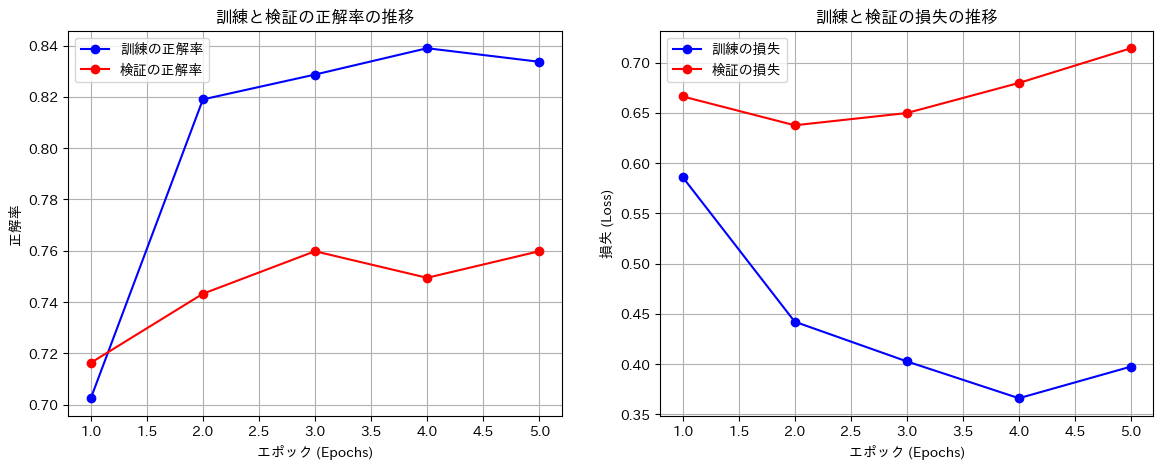

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib # 日本語表示のため

# --- 訓練過程のデータを取得 ---
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# --- 2つのグラフを描画 ---
plt.figure(figsize=(14, 5))

# 左側のグラフ：正解率(Accuracy)の推移
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='訓練の正解率')
plt.plot(epochs, val_acc, 'ro-', label='検証の正解率')
plt.title('訓練と検証の正解率の推移')
plt.xlabel('エポック (Epochs)')
plt.ylabel('正解率')
plt.legend()
plt.grid(True)

# 右側のグラフ：損失(Loss)の推移
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='訓練の損失')
plt.plot(epochs, val_loss, 'ro-', label='検証の損失')
plt.title('訓練と検証の損失の推移')
plt.xlabel('エポック (Epochs)')
plt.ylabel('損失 (Loss)')
plt.legend()
plt.grid(True)

plt.show()

##ハイブリット推論モデルの作成


ランダムフォレストモデルの訓練を開始...
モデルの訓練が完了。

テストデータで性能を評価...


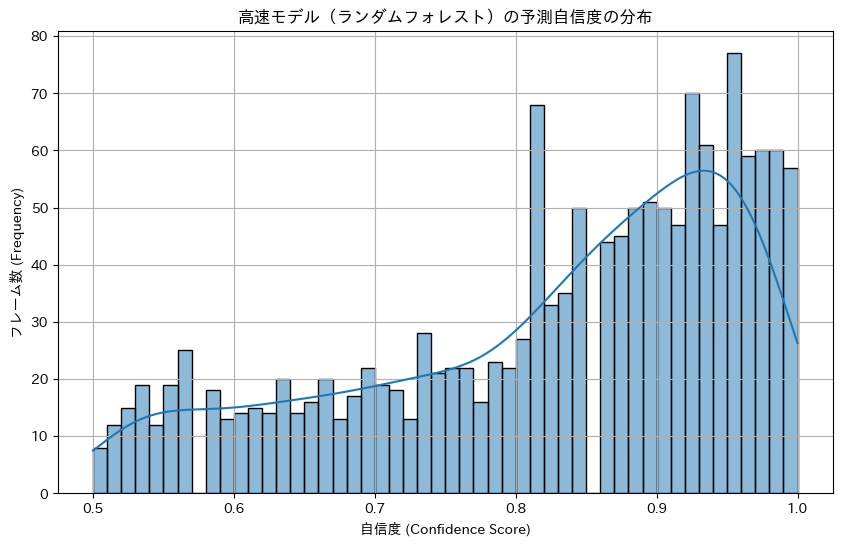


正解率 (Accuracy): 0.6862

Classification Report:
              precision    recall  f1-score   support

     1: 直線歩行       0.65      0.87      0.75       797
     2: 方向転換       0.76      0.48      0.59       704

    accuracy                           0.69      1501
   macro avg       0.71      0.67      0.67      1501
weighted avg       0.70      0.69      0.67      1501



In [ ]:
import pandas as pd
import numpy as np
import glob
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 日本語表示のためのライブラリ
!pip install -q japanize-matplotlib
import japanize_matplotlib

# --- 1. データの準備 (変更なし) ---
features_directory = 'features_landmarks'
all_files = sorted(glob.glob(os.path.join(features_directory, '*.csv')))
train_files = all_files[:12]
test_files = all_files[12:]
train_df = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)
test_df = pd.concat([pd.read_csv(f) for f in test_files], ignore_index=True)

feature_columns = ['torso_angle_deg', 'travel_angle_smooth', 'speed_smooth', 'torso_angular_velocity_smooth', 'travel_angular_velocity_smooth', 'speed_acceleration_smooth']
label_column = 'phase_label'
columns_to_check_for_nan = feature_columns + [label_column]
train_df.dropna(subset=columns_to_check_for_nan, inplace=True)
test_df.dropna(subset=columns_to_check_for_nan, inplace=True)

X_train = train_df[feature_columns]
y_train = train_df[label_column]
X_test = test_df[feature_columns]
y_test = test_df[label_column]

# --- 2. モデルの訓練 (変更なし) ---
print("\nランダムフォレストモデルの訓練を開始...")
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model_rf.fit(X_train, y_train)
print("モデルの訓練が完了。")

# --- 3. 【ここからが変更点】モデルの評価と「自信度」の可視化 ---
print("\nテストデータで性能を評価...")

# 変更点1: predictの代わりに predict_proba を使い、「確率」を予測させる
y_pred_proba = model_rf.predict_proba(X_test)

# 確率が最も高いクラスを最終的な予測とする
# np.argmax(..., axis=1)は、各行で確率が最大となるインデックス(0か1)を返す
# scikit-learnのクラスは1, 2なので、+1して調整
y_pred = np.argmax(y_pred_proba, axis=1) + 1

# --- ここからが「自信度」の確認 ---
# 予測したクラスの確率（＝自信度）を取り出す
confidence_scores = np.max(y_pred_proba, axis=1)

# 自信度の分布をヒストグラムで可視化
plt.figure(figsize=(10, 6))
sns.histplot(confidence_scores, bins=50, kde=True)
plt.title('高速モデル（ランダムフォレスト）の予測自信度の分布')
plt.xlabel('自信度 (Confidence Score)')
plt.ylabel('フレーム数 (Frequency)')
plt.grid(True)
plt.show()

# --- 4. 最終的な性能レポート (変更なし) ---
print(f"\n正解率 (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['1: 直線歩行', '2: 方向転換']))